# Exploratory data analysis (EDA) of apartments data: city apartments

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [3]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [4]:
# Filter apartments 
df = df_orig.loc[(df_orig['pop_dens'] >= df_orig['pop_dens'].quantile(0.90)) & (df_orig['area'] <= 400) & (df_orig['price_per_m2'] > 10)]

### Shape (number of rows and colums)

In [5]:
# Number of rows and columns
print(df_orig.shape)

(786, 16)


### Data types

In [6]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [7]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,261.000000,261.000000,261.0,261.000000,261.000000,261.000000,261.000000,261.000000,261.0,261.000000,261.0,2.610000e+02,2.610000e+02
mean,47.383037,8.529725,261.0,2.925287,75.961686,0.015326,3236.160920,47.847395,420217.0,4778.994655,491193.0,3.245847e+01,8.293274e+04
std,0.020660,0.028274,0.0,1.286458,40.727123,0.123081,1675.371933,20.821260,0.0,0.000000,0.0,7.119079e-15,1.457987e-11
min,47.323917,8.470620,261.0,1.000000,10.000000,0.000000,820.000000,19.440000,420217.0,4778.994655,491193.0,3.245847e+01,8.293274e+04
25%,47.366749,8.514750,261.0,2.000000,48.000000,0.000000,2150.000000,34.510000,420217.0,4778.994655,491193.0,3.245847e+01,8.293274e+04
50%,47.381935,8.530695,261.0,2.500000,70.000000,0.000000,2900.000000,41.940000,420217.0,4778.994655,491193.0,3.245847e+01,8.293274e+04
75%,47.399437,8.552139,261.0,3.500000,97.000000,0.000000,3739.000000,53.250000,420217.0,4778.994655,491193.0,3.245847e+01,8.293274e+04
max,47.431305,8.590806,261.0,8.500000,250.000000,1.000000,9950.000000,149.900000,420217.0,4778.994655,491193.0,3.245847e+01,8.293274e+04


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [8]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 261 Min: 820.0 Max: 9950.0 Mean: 3236.2 Median: 2900.0 Std: 1675.4
Area: Count: 261 Min: 10.0 Max: 250.0 Mean: 76.0 Median: 70.0 Std: 40.7


### Skewness

In [9]:
df[['price','rooms', 'area']].skew()

price    1.599299
rooms    0.784033
area     0.987975
dtype: float64

### Kurtosis

In [10]:
df[['price','rooms', 'area']].kurtosis()

price    2.912151
rooms    1.498519
area     1.445388
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


In [12]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
20,1693998214-82,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3790.0,126.33,420217,4778.994655,491193.0,32.458468,82932.737704
21,1693998214-83,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,25.0,0,3490.0,139.60,420217,4778.994655,491193.0,32.458468,82932.737704
107,1693998280-434,"Neugasse 40, 8005 Zürich, ZH",47.382469,8.530180,261,Zürich,1.0,11.0,0,1120.0,101.82,420217,4778.994655,491193.0,32.458468,82932.737704
154,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.00,420217,4778.994655,491193.0,32.458468,82932.737704
171,1693998309-621,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3890.0,129.67,420217,4778.994655,491193.0,32.458468,82932.737704
185,1693998317-658,"8004 Zürich, ZH",47.380417,8.525352,261,Zürich,1.0,10.0,0,1499.0,149.90,420217,4778.994655,491193.0,32.458468,82932.737704


### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Zürich'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.5,7.0,7.5,8.5
luxurious,,,,,,,,,,,,,,
0,25,28,24,55,10,60,16,28,1,4,2,2,1,1
1,0,0,0,3,0,1,0,0,0,0,0,0,0,0


### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            25   24.400000    25  1392.440000           25  63.784400
1.5   0            28   35.107143    28  2245.214286           28  70.157857
2.0   0            24   52.875000    24  2464.041667           24  50.563333
2.5   0            55   62.309091    55  3008.690909           55  49.154727
      1             3   78.666667     3  4345.333333            3  56.290000
3.0   0            10   74.300000    10  2858.100000           10  38.413000
3.5   0            60   91.783333    60  3545.300000           60  38.944167
      1             1  100.000000     1  9150.000000            1  91.500000
4.0   0            16   93.875000    16  3164.250000           16  33.489375
4.5   0            28  127.500000    28  5145.821429           28  39.740000
5.0   0             1  110.000000     1  3690.000000            1  33.550000
5.5   0             4  150.750000     4  5428.750000            4  36.957500
6.5   0             2  200.500000     2  6075.000000            2  30.790000
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             1  205.000000     1  5395.000000            1  26.320000
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [16]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.999998,0.999797,0.972903,NaN,-0.998878
area,0.999998,1.000000,0.999831,0.973316,NaN,-0.998953
price,0.999797,0.999831,1.000000,0.977326,NaN,-0.999586
price_per_m2,0.972903,0.973316,0.977326,1.000000,NaN,-0.981830
pop_dens,NaN,NaN,NaN,NaN,NaN,NaN
frg_pct,-0.998878,-0.998953,-0.999586,-0.981830,NaN,1.000000


### Covariance matrix

In [17]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.654973e+00,4.598174e+01,1.363449e+03,-12.114099,0.0,-1.213632e-30
area,4.598174e+01,1.658699e+03,5.106808e+04,-399.953062,0.0,9.010005e-29
price,1.363449e+03,5.106808e+04,2.806871e+06,3188.640536,0.0,-7.158294e-27
price_per_m2,-1.211410e+01,-3.999531e+02,3.188641e+03,433.524882,0.0,0.000000e+00
pop_dens,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00
frg_pct,-1.213632e-30,9.010005e-29,-7.158294e-27,0.000000,0.0,5.068128e-29


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

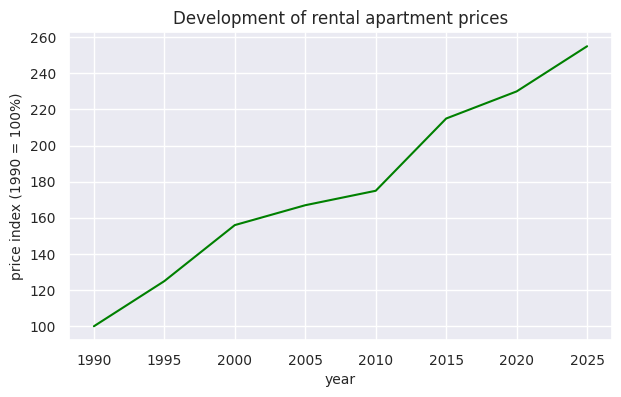

In [18]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

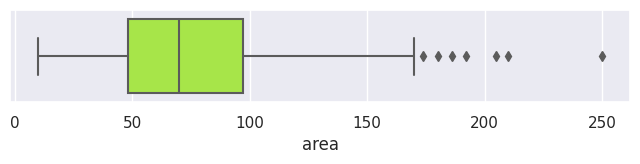

In [19]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

<Axes: xlabel='price_per_m2'>

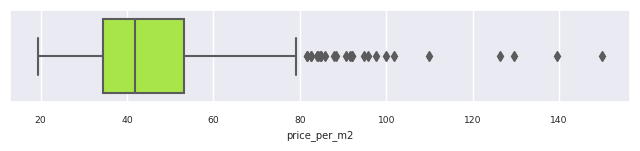

In [33]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price_per_m2'], color="greenyellow")

### Histogram  (matplotlib)

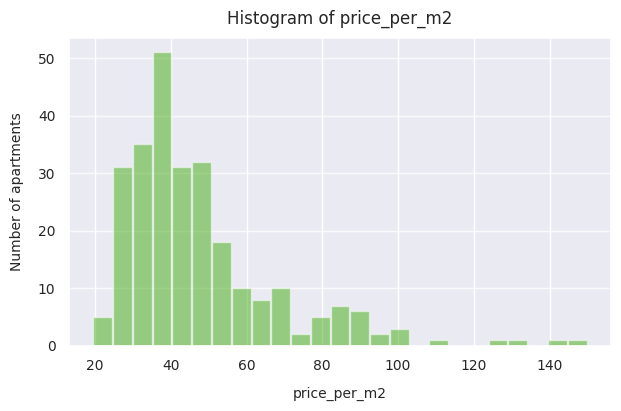

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

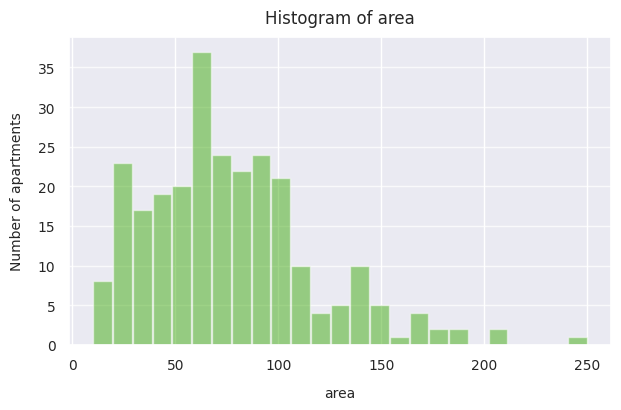

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['area'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

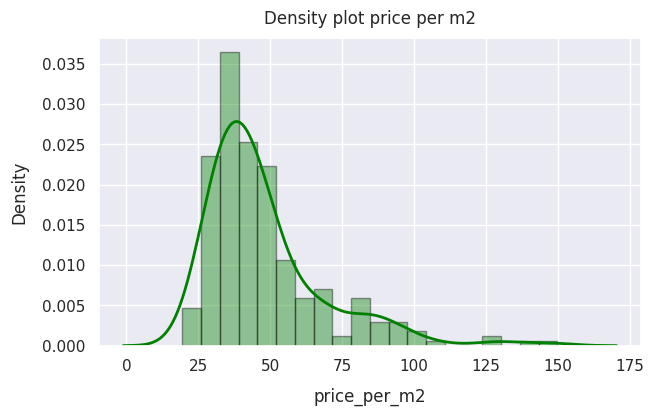

In [21]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
185   10.0 -1.619601
107   11.0 -1.595047
190   14.0 -1.521386
52    15.0 -1.496833
154   15.0 -1.496833
..     ...       ...
130  186.0  2.701844
13   192.0  2.849166
65   205.0  3.168363
26   210.0  3.291131
205  250.0  4.273278

[261 rows x 2 columns]


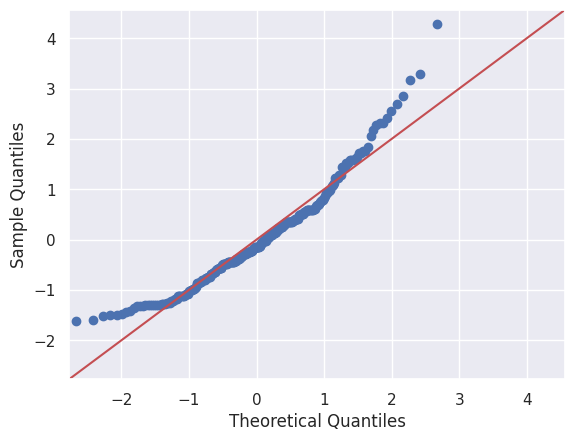

In [22]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [23]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[8.5, 7.5, 5.0, 7.0, 6.5, 5.5, 3.0, 4.0, 2.0, 1.0, 4.5, 1.5, 2.5, 3.5]

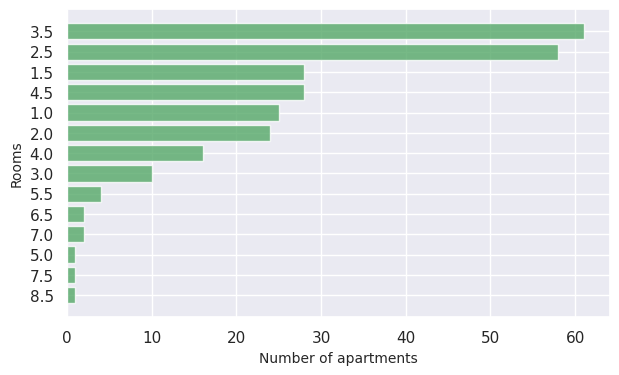

In [24]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

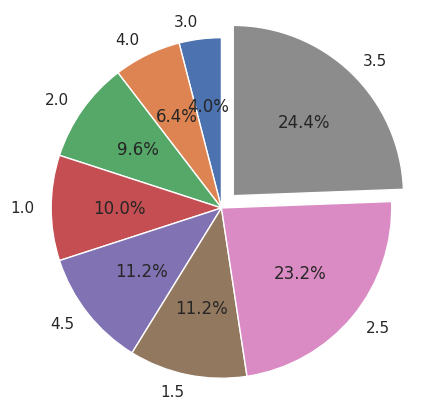

In [25]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

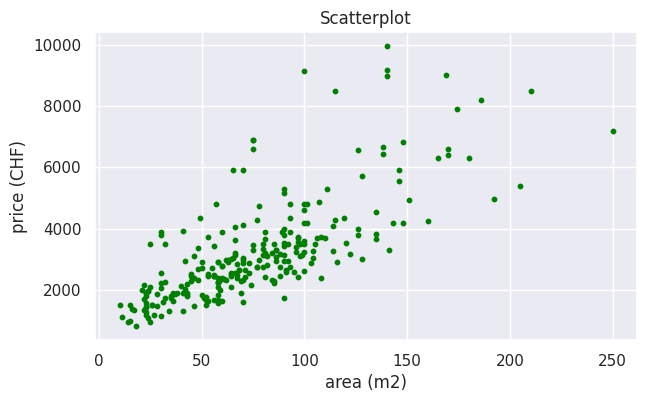

In [26]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(257, 17)
30.503080855974748
927.3740886034043


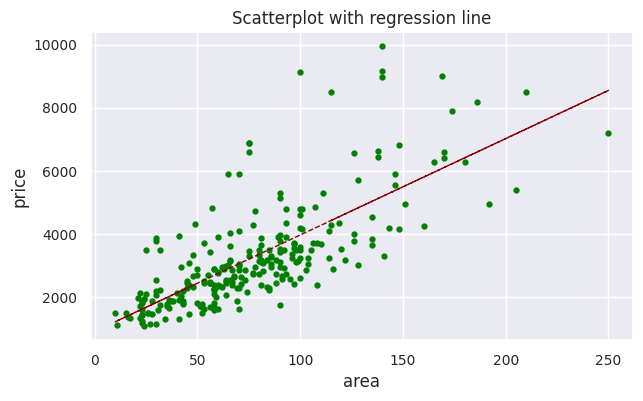

In [27]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

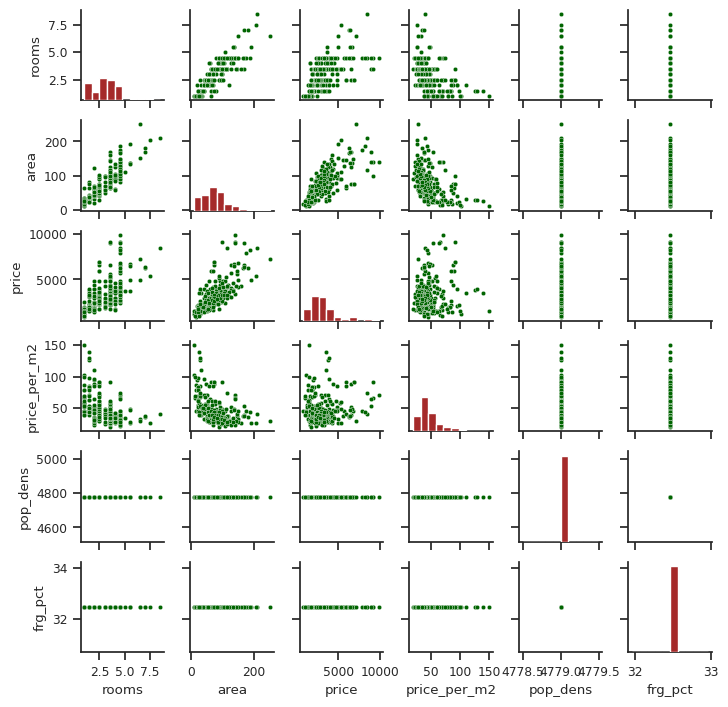

In [28]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(239, 17)


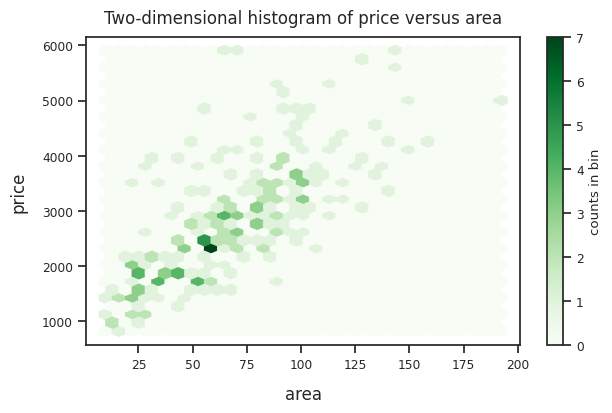

In [29]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

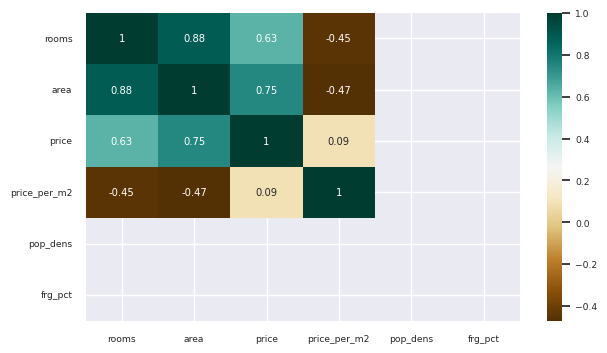

In [30]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

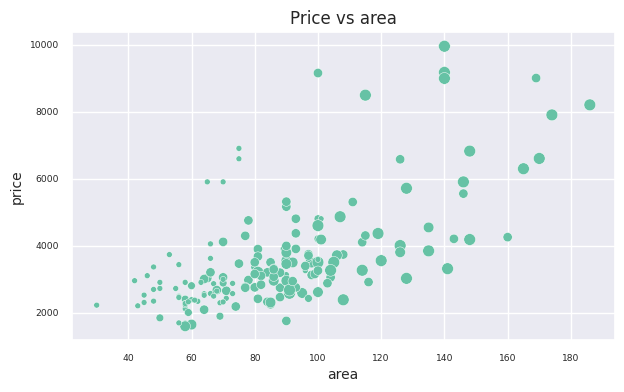

In [31]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-10-10 06:08:00
Python Version: 3.10.13
-----------------------------------
